In [1]:
import d6tflow
from tasks.preprocessing import ProblemType, TaskVocabCreator
from tasks.random_forest import TaskEvaluateRandomForest

Loading postgres module without psycopg2 installed. Will crash at runtime if postgres functionality is used.
Loading S3 module without the python package boto3. Will crash at runtime if S3 functionality is used.
Welcome to d6tflow!


In [2]:
d6tflow.settings.log_level = 'WARNING' # 'DEBUG', 'INFO', 'WARNING', 'ERROR', 'CRITICAL'

In [3]:
d6tflow.run(TaskVocabCreator(max_vocab_size=1000))

True

###Running TaskEvaluateRandomForest
Length Train: 3006402, length Test 709736
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.1s finished
Average number of nodes 98371
Average maximum depth 36
Test Accuracy 0.9925747

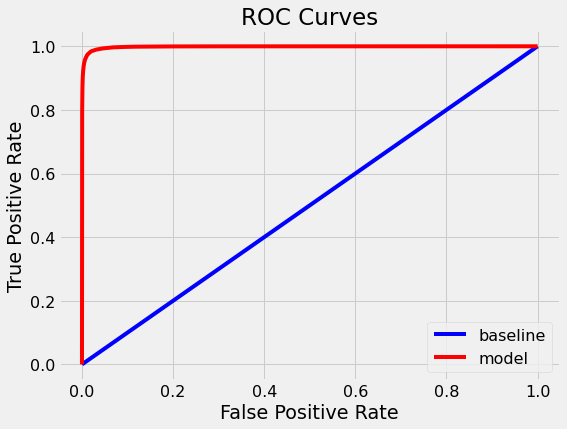

Normalized confusion matrix
[[0.99848258 0.00151742]
 [0.10255916 0.89744084]]


True

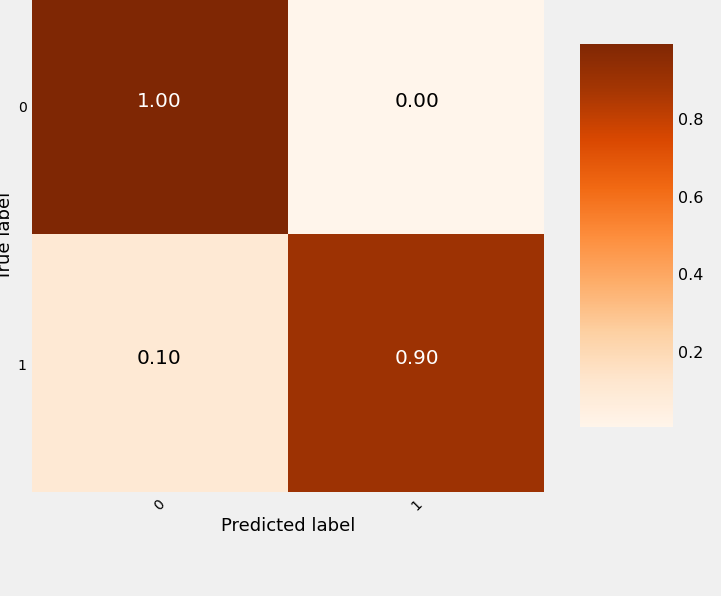

In [4]:
d6tflow.run(TaskEvaluateRandomForest(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=True, ratio_after_oversampling=0.5))


###Running TaskTrainTestSplit
Length Train: 4008536, length Test 709736
###Running TaskTrainRandomForest
Feature Distribution: Train: 50.0%, Test: 5.846962814342234%
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.0min finished
###Running TaskEvaluateRandomForest
Length Train: 4008536, length Test 709736
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   56.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   54.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks    

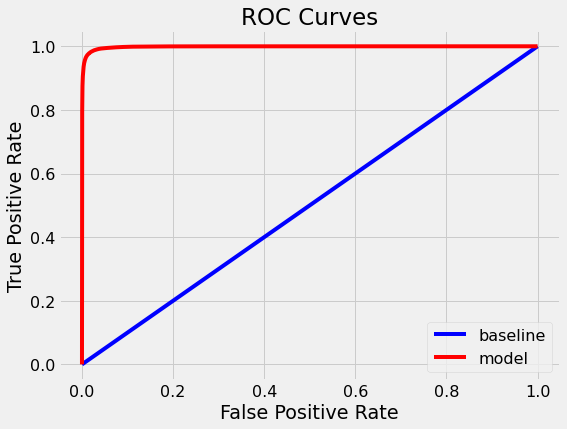

Normalized confusion matrix
[[0.99850502 0.00149498]
 [0.10663164 0.89336836]]


True

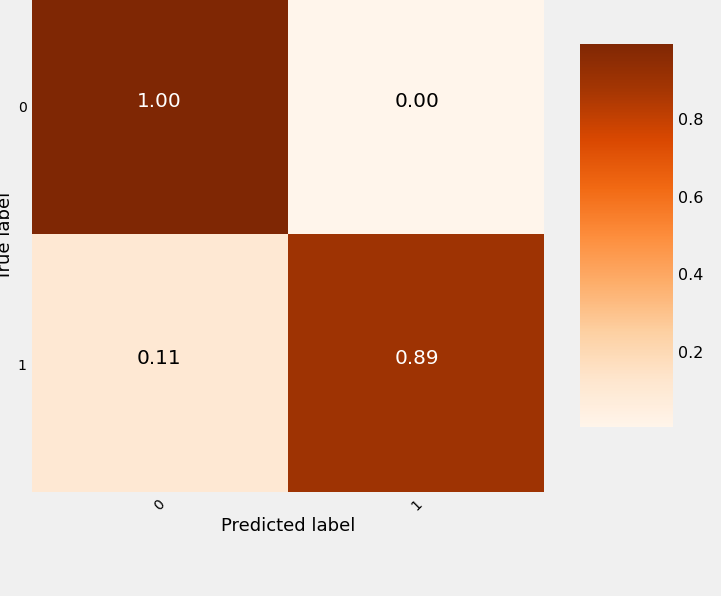

In [5]:
d6tflow.run(TaskEvaluateRandomForest(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=True, ratio_after_oversampling=1.0))

###Running TaskTrainTestSplit
Length Train: 374820, length Test 709736
###Running TaskTrainRandomForest
Feature Distribution: Train: 33.333333333333336%, Test: 5.846962814342234%
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.9s finished
###Running TaskEvaluateRandomForest
Length Train: 374820, length Test 709736
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  

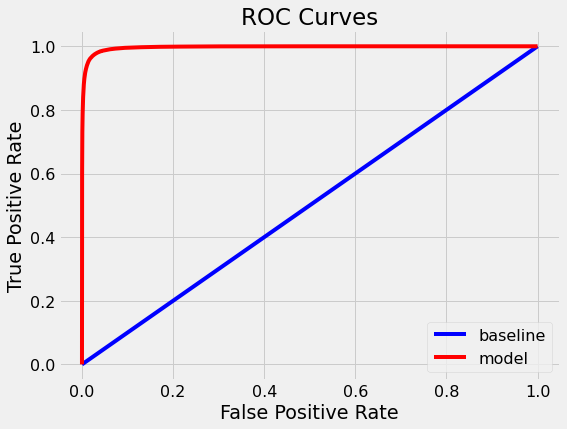

Normalized confusion matrix
[[0.98293871 0.01706129]
 [0.04038749 0.95961251]]


True

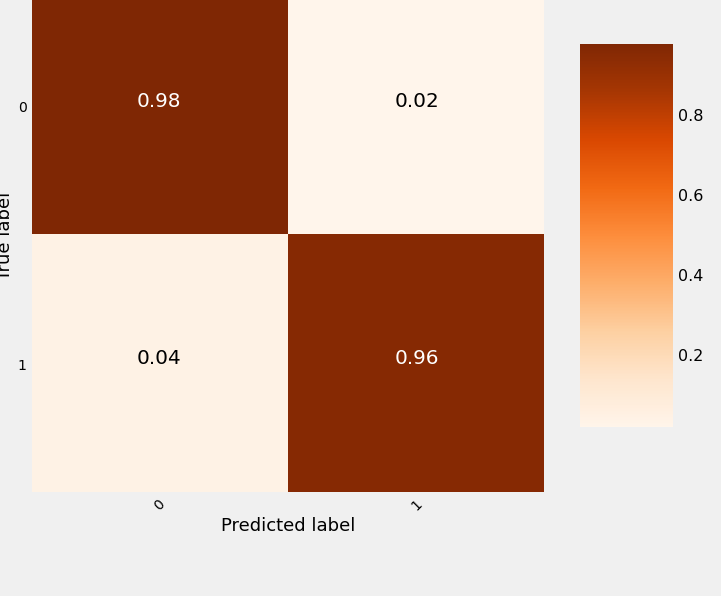

In [6]:
d6tflow.run(TaskEvaluateRandomForest(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5))

###Running TaskTrainTestSplit
Length Train: 1374340, length Test 709736
###Running TaskTrainRandomForest
Feature Distribution: Train: 9.090909090909092%, Test: 5.846962814342234%
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
###Running TaskEvaluateRandomForest
Length Train: 1374340, length Test 709736
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 

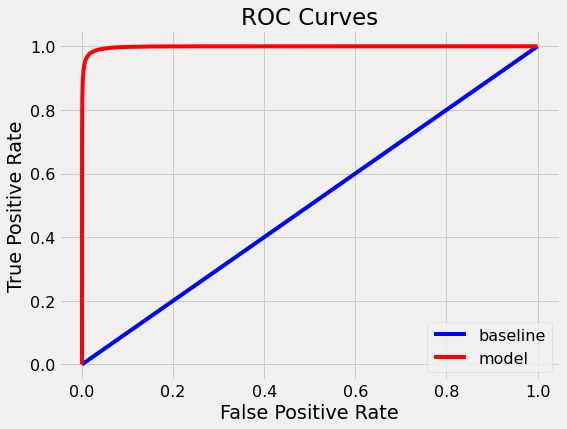

Normalized confusion matrix
[[0.99817281 0.00182719]
 [0.10747506 0.89252494]]


True

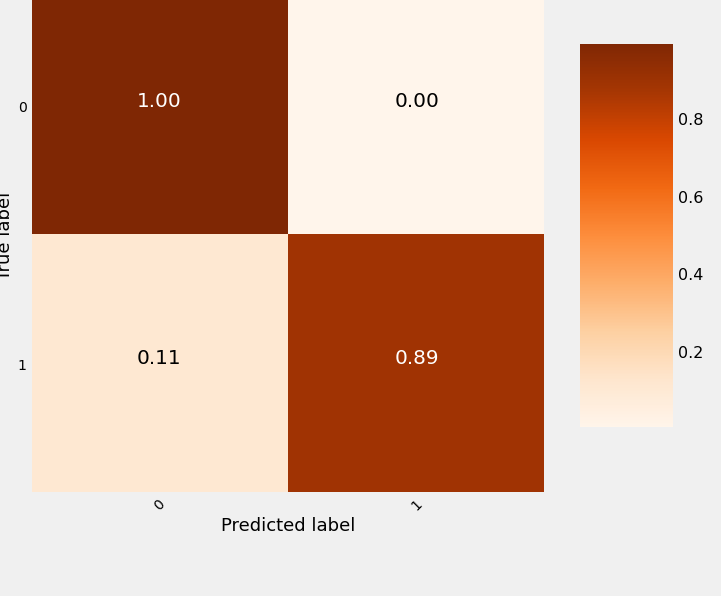

In [7]:
d6tflow.run(TaskEvaluateRandomForest(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.1))

# SVM

In [3]:
import d6tflow
from tasks.svm import TaskEvaluateSVM, TaskTrainSVM
from tasks.preprocessing import TaskTrainTestSplit
from tasks.preprocessing import ProblemType

In [9]:
d6tflow.run(TaskEvaluateSVM(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, svm_kernel="rbf", svm_predict_probability=True))

###Running TaskTrainSVM
Feature Distribution: Train: 33.333333333333336%, Test: 5.846962814342234%
[LibSVM]

In [5]:
d6tflow.run(TaskEvaluateSVM(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.1, svm_kernel="rbf", svm_predict_probability=True))

NameError: name 'TaskEvaluateSVM' is not defined

In [6]:
d6tflow.run(TaskEvaluateSVM(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, svm_kernel="rbf", svm_predict_probability=True, svm_class_weight="balanced"))

NameError: name 'TaskEvaluateSVM' is not defined

In [7]:
d6tflow.run(TaskEvaluateSVM(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.3, svm_kernel="rbf", svm_predict_probability=True, svm_class_weight="balanced"))

NameError: name 'TaskEvaluateSVM' is not defined

# Gradient Boosting Trees

In [8]:
import d6tflow
from tasks.gradient_boosting_classifier import TaskEvaluateGradientBoostingClassifier, TaskTrainGradientBoostingClassifier
from tasks.preprocessing import TaskTrainTestSplit
from tasks.preprocessing import ProblemType

ModuleNotFoundError: No module named 'tasks'

In [9]:
d6tflow.run(TaskEvaluateGradientBoostingClassifier(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, learning_rate=0.1, n_estimators=100))

NameError: name 'TaskEvaluateGradientBoostingClassifier' is not defined

In [10]:
d6tflow.run(TaskEvaluateGradientBoostingClassifier(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, learning_rate=0.2, n_estimators=100))

NameError: name 'TaskEvaluateGradientBoostingClassifier' is not defined

In [11]:
from models.random_forst import decode_vector
from tasks.preprocessing import TaskVocabCreator

df = TaskEvaluateGradientBoostingClassifier(problem_type=ProblemType.CONDITION_COMPARISON, oversampling_enabled=False, undersampling_enabled=True, ratio_after_undersampling=0.5, learning_rate=0.1, n_estimators=100).outputLoad()
vocab = TaskVocabCreator().outputLoad()
reversed_vocab = dict([(value, key) for key, value in vocab.items()]) 

wrong_predicted = df[df["ground_truth"] == 1 ]#!= df["predicted"]]
wrong_predicted["decoded"] = wrong_predicted["x"].apply(lambda row: decode_vector(row, reversed_vocab))
wrong_predicted["src"] = wrong_predicted["decoded"].apply(lambda row: " ".join(row[1::2]))
wrong_predicted[wrong_predicted["ground_truth"] == 1]["src"].apply(lambda row: print(row))


ModuleNotFoundError: No module named 'models'